# Lossy image compression using PCA

We will use Principal Component Analysis (PCA) to compress an image. We have a single sample, and n_pixels features. This is a problem if we want to efficiently represent our data with PCA. Our approach will therefore consider our image as a samples by features matrix, where each row of the image is a sample and the columns are features. Note that we could have chosen equivalently to do the contrary (samples as columns and features as rows).

The approach we are taking is to represent our image in the PCA space with a limited number of components. We want to select the smallest number of components that will preserve the image quality.

## Loading the data

We first need to load the image. One of the most common Python packages to process image is called PIL (Python Imaging Library). We will use it at the very beginning to convert our image into a numpy array.

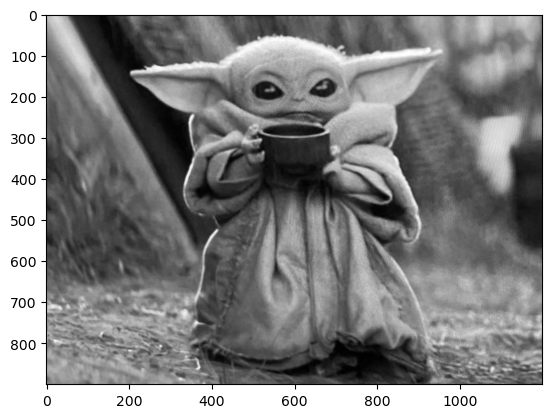

In [276]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/baby_yoda.jpeg", "r") # load the image
img = img.convert("L") # convert to grayscale

img_npy = np.array(img)

plt.imshow(img_npy, aspect="auto", cmap="gray")

# of components needed to explain 90% of data variance: 17


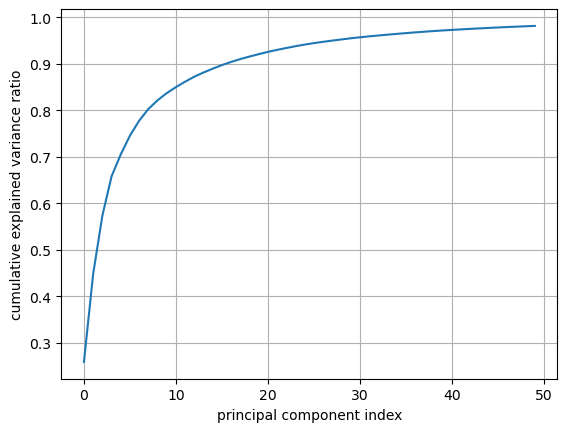

In [277]:
# Run a Principal Component Analysis on the image with 50 components
pca = PCA(n_components=50)
img_pca = pca.fit_transform(img_npy)
# Display explained variance in a plot with x-axis as "component ID" and y-axis as "cumulative explained variance ratio"
plt.xlabel('principal component index')
plt.ylabel('cumulative explained variance ratio')
plt.grid()
plt.plot(range(0,50), pca.explained_variance_ratio_.cumsum())
# Calculate components needed to explain 90% of data variance 
pca_data_variance = PCA()
pca_data_variance.fit(img_npy)
cumsum = np.cumsum(pca_data_variance.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print(f'# of components needed to explain 90% of data variance: {d}')

In [278]:
# Compute compressed image (its PCA representation) using the PCA fitted above
print(f'Compressed image: {img_pca.shape}')
# Compute the ratio of the size of the compressed image relative to that of the original image
amount_compressed = (img_npy.shape[1] - img_pca.shape[1])
ratio_size = (img_npy.shape[1]/img_pca.shape[1])
print(f'Amount compressed: {amount_compressed}')
print(f'Ratio: {ratio_size}')
# Show inverse transform of compressed image
img_pca_recovered = pca.inverse_transform(img_pca)
print(f'Inverse transform of the compressed image: {img_pca_recovered.shape}')

Compressed image: (900, 50)
Amount compressed: 1150
Ratio: 24.0
Inverse transform of the compressed image: (900, 1200)


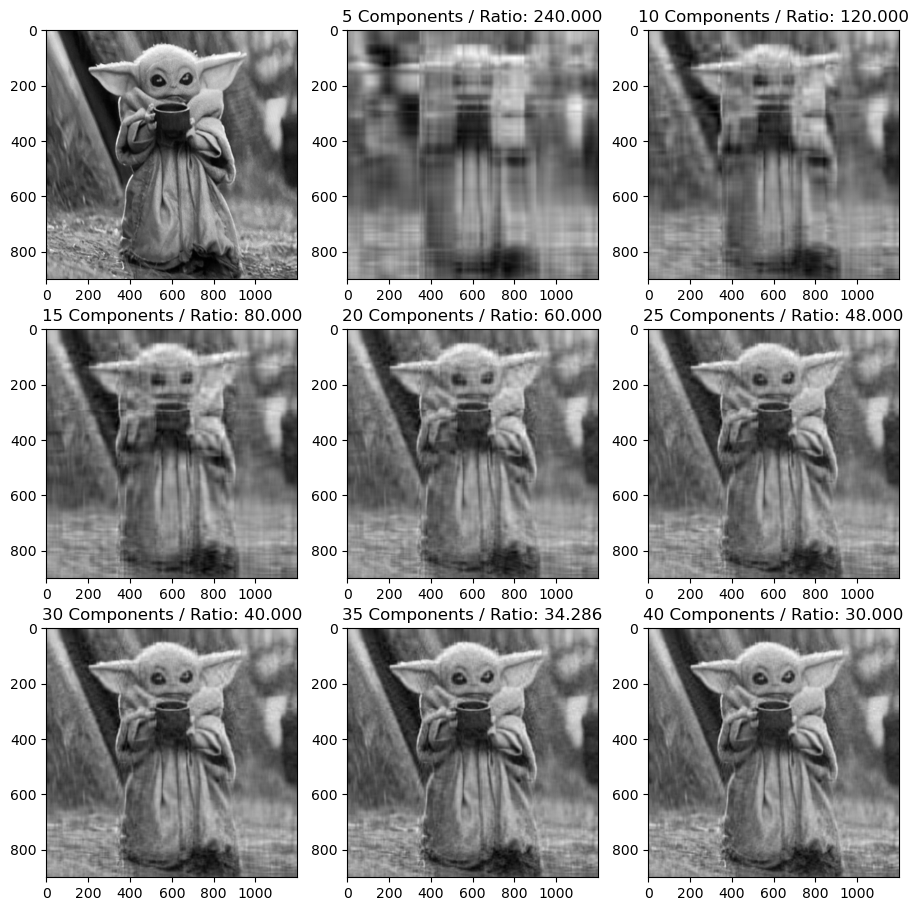

In [279]:
# Visualize compressed images on a 3 x 3 subplot with varying number of components from 5 to 40 with a step of 5
plt.figure(figsize=(11, 11))
plt.subplot(3, 3, 1)
plt.imshow(img_npy, aspect='auto', cmap='gray')

component_range = list(range(5,45,5))
subplot_range = list(range(2,10))

# Display each subplot with the compression ratio as well as number of components
for i in range(0,8):
    plt.subplot(3,3,subplot_range[i])
    pca=PCA(n_components=component_range[i])
    img_compressed_steps = pca.fit_transform(img_npy)
    compression_ratio = (img_npy.shape[1] / img_compressed_steps.shape[1])
    img_recovered = pca.inverse_transform(img_compressed_steps)
    plt.title(f'{component_range[i]} Components / Ratio: {compression_ratio:.3f}')
    plt.imshow(img_recovered, aspect='auto', cmap='gray')

